<h1><b>GROUP 9  PROJECT EXHIBITION 2 (DSN2099) 2022-23</b></h1>

<h3><b>HEART DISEASE PREDICTION</b></h3>

In this project we have made a Machine Learning Model that is capable of predicting whether a patient has a heart disease or not. The requirements of our project are a Python 3.8.12, some python packages like numpy, pandas, matplotlib, scikit-learn, seaborn and os. It is advisable to create a conda environment and continue with the project so as to counter the problem of dependancy errors as well as not harming your system in any other way. So now let's begin with the project.

To create a conda environment, you will need either Miniconda or Anaconda installed on your system. Now open up a terminal and run these commands one by one:-
<p>conda create -n hart_deezyz_pred python=3.8.12</p>
<p>conda activate hart_deezyz_pred</p>
<p>pip install numpy, pandas, matplotlib, sklearn, os, seaborn</p>

Next, go to the directory where this project folder is downloaded and select the appropriate kernel i.e heart_deezyz_pred

First lets import the necessary Modules.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
import seaborn as sns

<b>UNDERSTANDING THE DATA</b>

Before we begin, lets first read the data and print the first 5 rows of our data to get an idea of how our dataset is arranged. Then lets explore our data.

In [45]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Now lets plot a graph to give us an idea of how many males and females are there in our dataset. Males are represented in orange and females in blue.

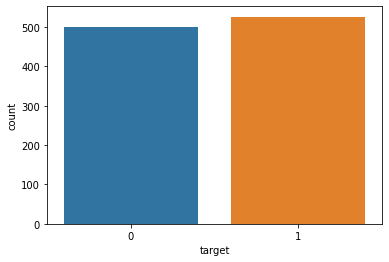

In [47]:
sns.countplot(x="target", data=df)

Now lets check the precentage of people who have heart diseases.

In [48]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


Now lets see how many males and females have heart diseases in the form of a bar graph.

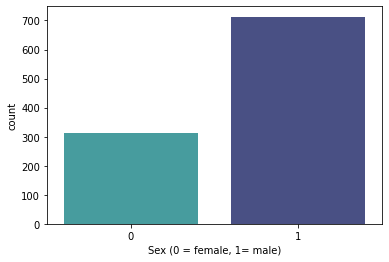

In [49]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

Now lets see what are the percentages of male and female patients.

In [50]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


Before we proceed lets compute a simple cross tabulation of the 2 factors female and male based on first frequency of heart disease with age. Then another cross tabular analysis of regarding who have the disease and who dont based on frequency.

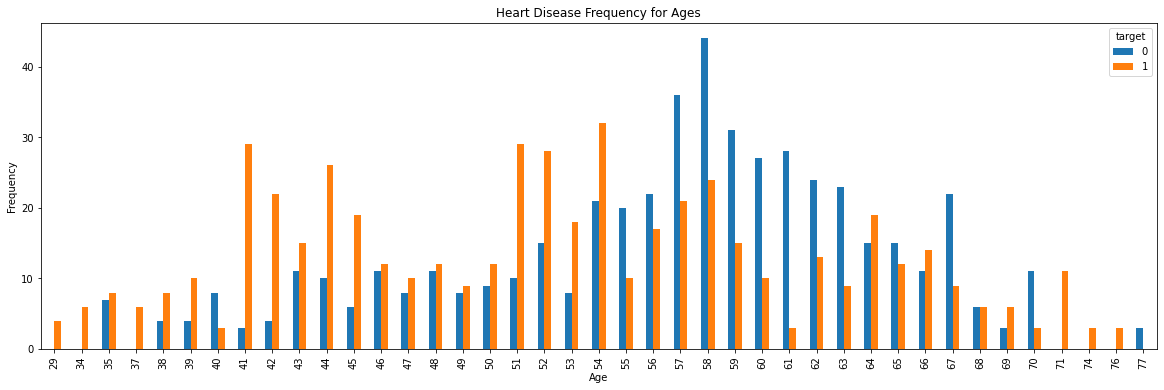

In [51]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

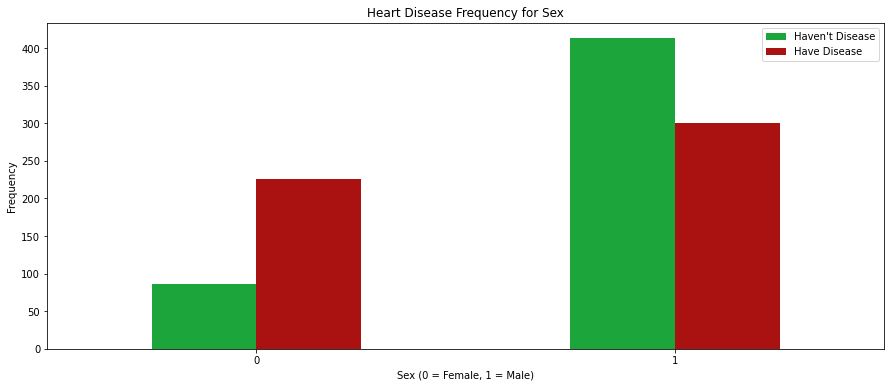

In [52]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Now lets create a scatterplot of the data.

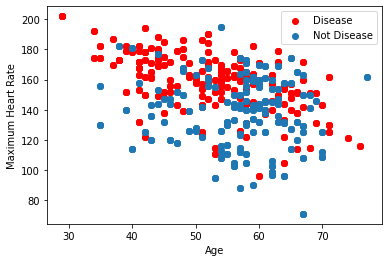

In [53]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [54]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [55]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [57]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [58]:
accuracies = {}

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 98.05%


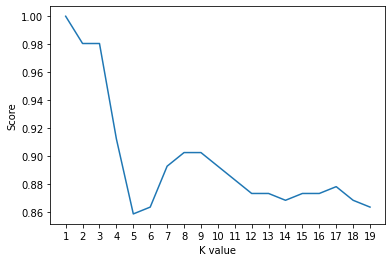

Maximum KNN Score is 100.00%


In [60]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))